# Graphical Granger Method: Exhaustive 

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from itertools import permutations
import graphviz
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"] = [30,10]

In [3]:
data = pd.read_csv('output.csv')

In [4]:
target = 'x1'
predictors = ['x0',  'x2', 'x3', 'x4']
data[[target] + predictors]

,x1,x0,x2,x3,x4
0,-0.100499,-1.662189,-1.350334,-1.189624,-0.043115
1,0.998092,-0.741303,-0.468603,-0.055062,-0.594633
2,0.684597,0.539278,-0.147328,0.184362,-0.728728
3,-1.276413,0.958720,0.059814,0.737735,0.608021
4,0.217208,0.112009,1.193067,-0.400950,0.243941
...,...,...,...,...,...
1005,0.212048,-0.164189,-0.034687,-0.231840,1.779268
1006,0.249115,2.396835,1.402381,-1.465014,0.073279
1007,0.324912,0.964347,-0.102053,1.043437,0.069016
1008,-1.038647,2.404369,0.790429,1.219525,-0.556328


Apply exhaustive use of Granger causality test.

This notion is based on the idea that a cause should be helpful in predicting the future effects, beyond what can be predicted solely based on their own past values.

x is said to “Granger cause” another time series y, if and only if regressing for y in terms of both past values of y and x is statistically significantly more accurate than doing so with past values of y only.

Granger Causality Test
* Y = A * y_lag
* Y = A * y_lag + B * x_lag

Compare Sum of Squared Errors distirubitons using F-test



In [6]:
from statsmodels.regression.linear_model import OLS

# Run ols on both models without and with lags of second variable
#res2down = OLS(dta[:, 0], dtaown).fit()
#res2djoint = OLS(dta[:, 0], dtajoint).fit()

In [29]:
r  = OLS(data['x0'].values, data[['x0', 'x2']].values).fit()

In [32]:
r.ssr

7.78964317764917e-28

In [33]:
r.df_resid

1008.0

(array([  4.,  12.,  59., 176., 199., 207., 153., 124.,  67.,   9.]),
 array([-1.77635684e-15, -1.33226763e-15, -8.88178420e-16, -4.44089210e-16,
         0.00000000e+00,  4.44089210e-16,  8.88178420e-16,  1.33226763e-15,
         1.77635684e-15,  2.22044605e-15,  2.66453526e-15]),
 <a list of 10 Patch objects>)

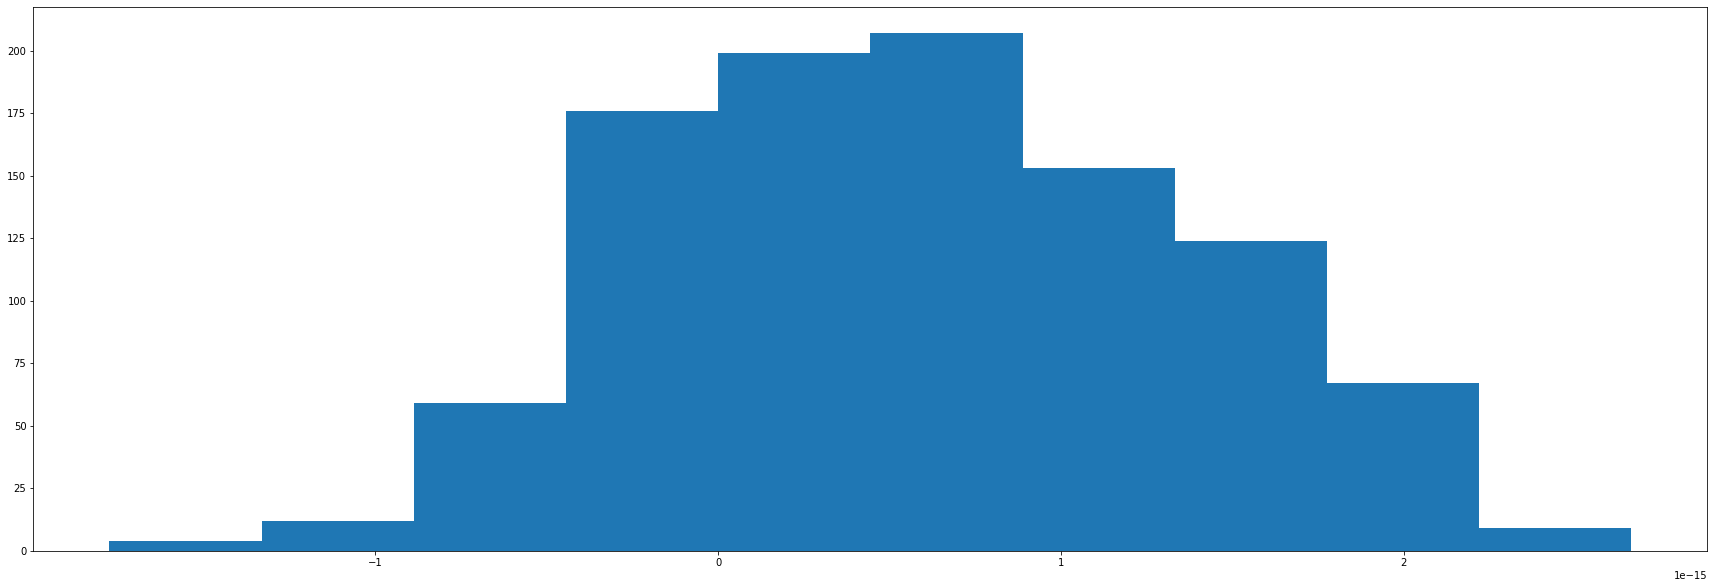

In [35]:
plt.hist(r.resid)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset